# KMeans Clustering

In [24]:
# import plotting and ml libraries
from IPython.display import display, HTML
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin
import matplotlib.pyplot as plt
%matplotlib inline

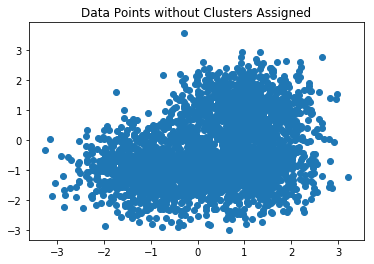

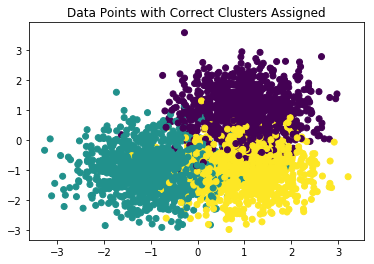

In [29]:
# create blox of data using predefined centers
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

plt.scatter(X[:,:1], X[:,1:])
plt.title('Data Points without Clusters Assigned')
plt.show()

plt.scatter(X[:,:1], X[:,1:],c=labels_true)
plt.title('Data Points with Correct Clusters Assigned')
plt.show()

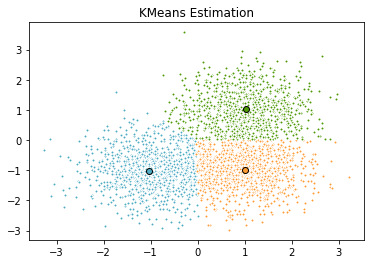

In [34]:
# create KMeans model and fit data, with 10 iterations of fitting to reduce randomness
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

# colors for output
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# k_means labels
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

# plot data and cluster centers in cluster formation from model
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    # plot data points in cluster
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    # plot cluster centers
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans Estimation')
plt.show()